## ML Project 
(Pridict the points of player PTS)

1. Load Data

In [454]:
import pandas as pd  
data = pd.read_csv('nba_data_processed.csv') 
data 




,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,McKinley Wright IV,PG,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,Thaddeus Young,PF,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,Trae Young,PG,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,Cody Zeller,C,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


In [455]:
data.dtypes


Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [456]:
data['Player'] = data['Player'].astype('category')  
data.dtypes


Player    category
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
dtype: object

In [457]:
data['Pos'] = data['Pos'].astype('category')

In [458]:
data['MP'] = data['MP'].astype('category')

In [459]:
data["Pos"].value_counts()  


SG       155
PG       124
C        117
PF       112
SF       112
PF-SF      2
SF-SG      1
SG-PG      1
Name: Pos, dtype: int64

In [460]:
data["Age"].value_counts() 

23.0    72
25.0    61
24.0    57
22.0    50
27.0    49
26.0    47
21.0    43
29.0    36
30.0    31
20.0    30
28.0    29
34.0    23
32.0    23
31.0    19
33.0    15
19.0    14
36.0    10
35.0     9
37.0     3
42.0     1
39.0     1
38.0     1
Name: Age, dtype: int64

In [461]:
data.isna()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [462]:
data.isna().sum()

Player    25
Pos       25
Age       25
Tm        25
G         25
GS        25
MP        25
FG        25
FGA       25
FG%       29
3P        25
3PA       25
3P%       55
2P        25
2PA       25
2P%       34
eFG%      29
FT        25
FTA       25
FT%       77
ORB       25
DRB       25
TRB       25
AST       25
STL       25
BLK       25
TOV       25
PF        25
PTS       25
dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21372\3325679598.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = data.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

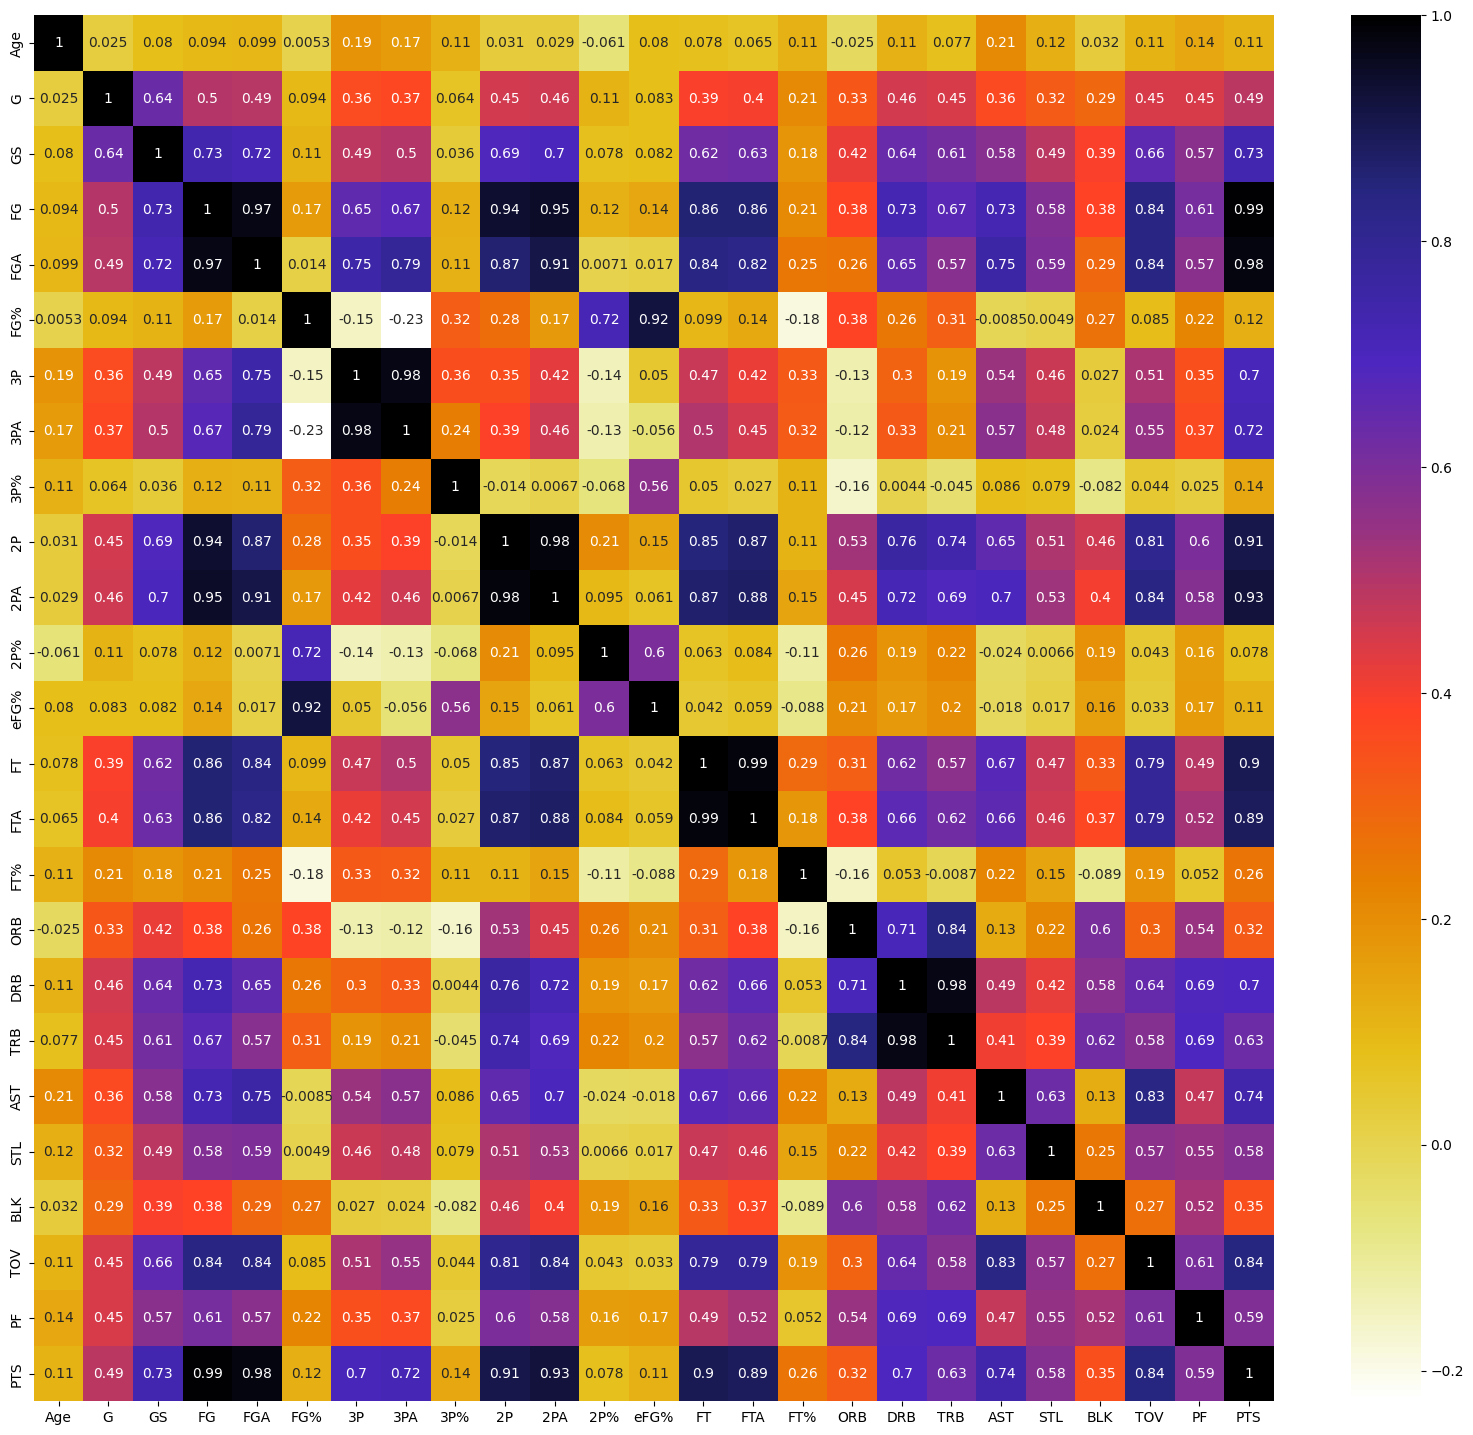

In [463]:
import seaborn as sb  
import matplotlib.pyplot as mp
mp.figure(figsize=(20,18)) 
corelation = data.corr() 
sb.heatmap(corelation , annot = True , cmap=mp.cm.CMRmap_r) 
mp.show

2. Data preparation (Data separation X & Y)

In [464]:
data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,McKinley Wright IV,PG,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,Thaddeus Young,PF,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,Trae Young,PG,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,Cody Zeller,C,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


In [465]:
data = data.drop('Player' , axis=1) 
data

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,0.5,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,0.0,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,0.9,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,1.4,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,PG,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,0.2,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,PF,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,0.1,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,PG,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,2.2,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,C,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,0.0,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


In [466]:
data = data.drop('Pos' , axis=1) 
data

,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,0.5,2.0,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,0.0,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,0.0,0.2,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,0.9,2.3,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,1.4,3.7,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,0.2,0.7,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,0.1,0.6,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,2.2,6.6,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,0.0,0.0,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


In [467]:
data = data.drop('Tm' , axis=1) 
data

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23.0,38.0,11.0,23.3,3.9,8.1,0.482,0.5,2.0,0.260,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,29.0,42.0,42.0,27.0,3.7,6.3,0.597,0.0,0.0,0.000,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,25.0,57.0,57.0,35.0,8.4,15.7,0.536,0.0,0.2,0.083,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,22.0,39.0,2.0,15.6,1.8,3.8,0.483,0.9,2.3,0.396,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,22.0,56.0,18.0,22.0,3.3,7.0,0.474,1.4,3.7,0.364,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,24.0,20.0,1.0,10.3,1.2,2.5,0.469,0.2,0.7,0.286,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,34.0,49.0,9.0,15.5,2.1,3.8,0.562,0.1,0.6,0.161,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,24.0,54.0,54.0,35.3,8.5,19.8,0.429,2.2,6.6,0.327,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,30.0,3.0,0.0,15.7,2.7,4.0,0.667,0.0,0.0,NaN,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


In [468]:
data = data.drop(['Age' , 'G' , 'GS' , 'FG%' , '3P%' , '2P%' , 'eFG%' , 'FT%' , 'ORB' , 'BLK' , 'PF' , 'FGA' , 'FTA' , 'STL' , 'TOV' , 'MP' , '3P' , '3PA' , 'DRB' , '2P' , 'FT' , 'TRB' , 'AST' , 'FG'], axis = 1) 
data

,2PA,PTS
0,6.1,10.2
1,6.2,8.6
2,15.5,21.2
3,1.5,5.0
4,3.3,9.4
...,...,...
644,1.8,2.9
645,3.1,4.7
646,13.1,27.0
647,4.0,6.3


In [469]:
data['2PA'].fillna(data['2PA'].mean() , inplace=True) 
data

,2PA,PTS
0,6.1,10.2
1,6.2,8.6
2,15.5,21.2
3,1.5,5.0
4,3.3,9.4
...,...,...
644,1.8,2.9
645,3.1,4.7
646,13.1,27.0
647,4.0,6.3


In [470]:
data['PTS'].fillna(data['PTS'].mean() , inplace=True) 
data

,2PA,PTS
0,6.1,10.2
1,6.2,8.6
2,15.5,21.2
3,1.5,5.0
4,3.3,9.4
...,...,...
644,1.8,2.9
645,3.1,4.7
646,13.1,27.0
647,4.0,6.3


In [471]:
Y = data['PTS'] 
Y

0      10.2
1       8.6
2      21.2
3       5.0
4       9.4
       ... 
644     2.9
645     4.7
646    27.0
647     6.3
648    10.2
Name: PTS, Length: 649, dtype: float64

In [472]:
X = data.drop('PTS'  , axis=1) 
X

,2PA
0,6.1
1,6.2
2,15.5
3,1.5
4,3.3
...,...
644,1.8
645,3.1
646,13.1
647,4.0


3. Data splitting (Training and Testing)

In [473]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test = train_test_split(X  , Y , test_size = 0.3, random_state = 400)     


In [474]:
X_train 

,2PA
104,2.1
552,4.4
631,5.2
376,4.7
562,5.8
...,...
407,10.4
140,0.9
318,1.3
463,0.5


In [475]:
X_test

,2PA
331,2.5
157,2.6
559,3.6
553,7.0
580,1.5
...,...
230,2.8
211,10.1
246,1.1
72,9.1


In [476]:
Y_train

104     5.5
552     9.0
631     8.2
376    10.1
562     8.4
       ... 
407    27.2
140     3.1
318     2.0
463     1.9
348     5.8
Name: PTS, Length: 454, dtype: float64

In [477]:
Y_test 

331     3.4
157     2.9
559     7.4
553    10.2
580     2.7
       ... 
230     6.4
211    21.8
246     2.9
72     17.7
415    12.2
Name: PTS, Length: 195, dtype: float64

# Build Model

In [478]:
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
a = LinearRegression()
a.fit(X_train , Y_train)  




LinearRegression()

In [479]:
b = LinearRegression() 
b.fit(X_test , Y_test)

LinearRegression()

In [480]:
Y_train_predict = a.predict(X_train)  
Y_test_predict = b.predict(X_test)  




In [481]:
Y_train_predict

array([ 5.19622304,  9.36153826, 10.81034355,  9.90484024, 11.89694752,
        4.65292105,  1.75531047,  8.63713561,  5.01512238,  9.36153826,
        5.01512238,  3.20411576,  7.18833032,  8.84116408,  4.47182039,
       18.23547068,  9.72373958,  9.36153826,  5.55842436,  3.74741774,
        9.72373958,  6.46392767,  3.56631708, 11.5347462 ,  6.64502833,
        8.84116408,  5.73952502,  8.84116408,  5.3773237 ,  3.74741774,
        6.46392767,  5.92062568,  6.10172635, 22.21968524,  9.72373958,
        7.55053164,  3.20411576,  7.91273296,  5.73952502,  8.84116408,
        5.55842436, 10.99144421, 26.74720178,  9.90484024,  2.29861245,
       10.26704157,  4.47182039,  2.84191444,  7.36943098,  6.28282701,
        7.00722965,  7.91273296, 18.05437002, 12.80245083,  4.47182039,
       17.51106803, 16.42446406,  6.10172635,  8.09383362,  5.19622304,
       23.12518855,  9.54263892,  7.7316323 , 12.44024951,  2.84191444,
        9.90484024, 22.4007859 ,  7.00722965,  2.47971311, 17.32

In [482]:
Y_test_predict

array([ 5.83856103,  6.01915028,  7.82504279, 13.96507734,  4.03266851,
        6.56091803,  8.75085211,  5.65797177,  1.32382974, 18.66039788,
       11.43682782, 29.67634221,  7.82504279,  2.949133  ,  7.82504279,
        4.93561477,  4.57443627, 10.89506007,  4.03266851,  4.57443627,
       15.04861285,  4.39384701,  4.93561477,  4.21325776,  6.92209653,
        4.39384701,  5.47738252, 10.17270306, 20.64687964, 18.66039788,
       10.17270306,  6.19973953, 14.14566659,  4.21325776,  3.12972225,
        1.8655975 ,  2.226776  ,  3.31031151,  9.2697568 ,  2.949133  ,
        6.01915028, 14.68743434, 18.47980862, 12.33977408,  7.64445354,
        9.63093531, 17.57686237,  6.38032878,  3.12972225,  8.18622129,
        6.92209653,  9.2697568 ,  7.46386429, 16.13214836, 18.47980862,
        4.39384701,  2.76854375,  3.31031151,  4.57443627,  6.92209653,
       19.92452264,  3.67149001,  6.92209653,  3.85207926, 11.43682782,
       17.57686237,  8.9085783 ,  3.67149001, 14.68743434,  1.32

# Evaluate Model performance

In [483]:
from sklearn.metrics import mean_squared_error , r2_score 
mse_train = mean_squared_error(Y_train , Y_train_predict) 
r2_train = r2_score(Y_train , Y_train_predict)   
mse_test = mean_squared_error(Y_test , Y_test_predict) 
r2_test = r2_score(Y_test , Y_test_predict) 



In [484]:
mse_train

6.495368594237457

In [485]:
r2_train

0.8605468520900236

In [486]:
mse_test

5.363694014676649

In [487]:
r2_test

0.8578404435805974

Data vizualization

[]

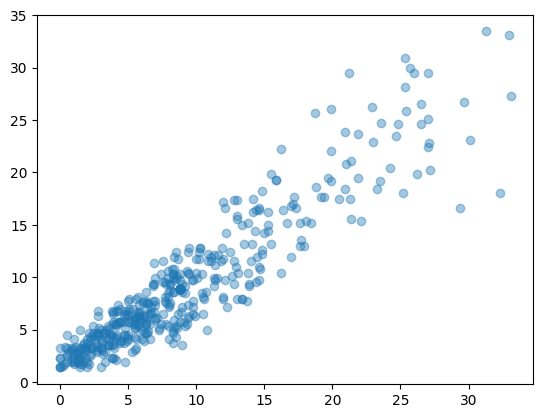

In [488]:
import matplotlib.pyplot as mp 
import numpy as np 
mp.scatter(x = Y_train , y= Y_train_predict , alpha=0.4) 
mp.plot()

[]

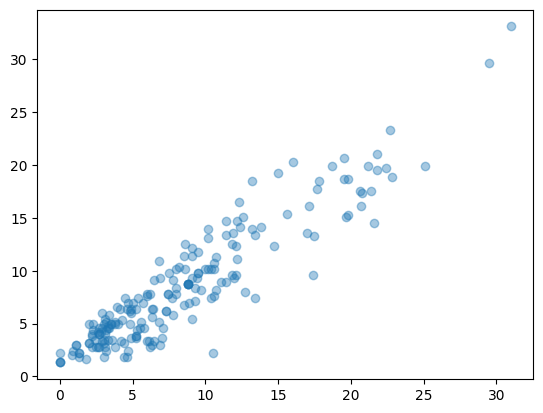

In [489]:
mp.scatter(x = Y_test , y = Y_test_predict , alpha=0.4)  

mp.plot()